# 7. ARIMA EInführungsbeispiele

In [31]:
import numpy as np
import pandas as pd

X = np.random.randn(500)
t = np.arange(0,500,1)
df = pd.DataFrame()
df['t'] = t
df['X'] = X
df


,t,X
0,0,0.806216
1,1,0.621213
2,2,-0.431278
3,3,-0.340491
4,4,-0.037703
...,...,...
495,495,-0.033384
496,496,1.137987
497,497,-1.027712
498,498,1.024817


In [32]:
import plotly.express as px

fig = px.line(df, x='t', y="X")
fig.show()

In [33]:
for i in range(0, len(X)):
    X[i] = 0.5*X[i-3] + X[i]
    
for i in range(0, len(X)):
    X[i] = 0.5*X[i-1] + X[i]

t = list(range(0, len(X)))
df = pd.DataFrame ()
df['t'] = t
df['X'] = X
df

,t,X
0,0,0.572976
1,1,1.420109
2,2,0.145688
3,3,-0.121467
4,4,0.468374
...,...,...
495,495,-0.832563
496,496,1.238536
497,497,-0.857105
498,498,0.301420


In [34]:
fig = px.line(df, x='t', y="X")
fig.show()

In [35]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(X, lags=3, trend='n')
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                     AutoReg(3)   Log Likelihood                -727.162
Method:               Conditional MLE   S.D. of innovations              1.045
Date:                Mon, 02 Dec 2024   AIC                           1462.325
Time:                        10:28:28   BIC                           1479.159
Sample:                             3   HQIC                          1468.932
                                  500                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.4038      0.042      9.594      0.000       0.321       0.486
y.L2           0.0050      0.046      0.110      0.912      -0.085       0.095
y.L3           0.3461      0.042      8.226      0.000       0.264       0.429
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1515           -0.0000j            1.1515           -0.0000
AR.2           -0.5830           -1.4729j            1.5841           -0.3100
AR.3           -0.5830           +1.4729j            1.5841            0.3100
-----------------------------------------------------------------------------
"""

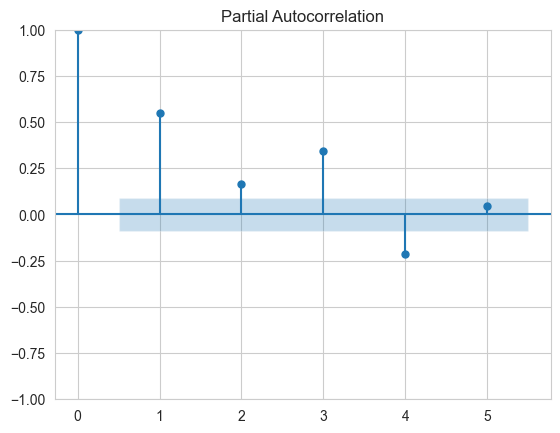

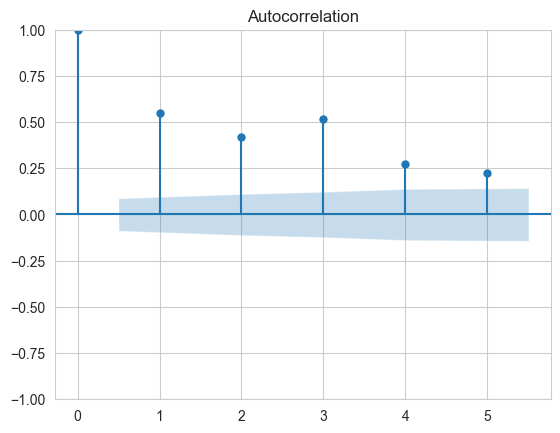

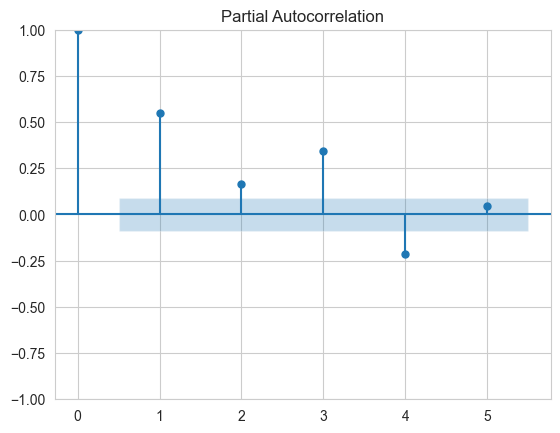

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(X, lags=5)
plot_pacf(X, lags=5)


### Auf Stationarität testen

In [37]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('Testergebnis, ','P-Wert')
result[0], result[1]


Testergebnis,  P-Wert


(-6.93389692023905, 1.0667665074100398e-09)